In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import  colors

import osmnx as ox
from shapely.geometry import Point

In [14]:
quality_stations_contaminant = pd.read_csv('qualitat_estacions_contaminants.csv')

In [15]:
len(quality_stations_contaminant)

1209

In [16]:
quality_stations_contaminant.loc[(quality_stations_contaminant['Codi_Contaminant'] == 10) &
                                 (quality_stations_contaminant['Dia'] == 4)]

,Unnamed: 0,Codi_provincia,Provincia,Codi_municipi,Municipi,Estacio,Codi_Contaminant,Any,Mes,Dia,...,Latitud,ubicacio,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Clas_1,Clas_2,Desc_Contaminant,Unitats
437,437,8,Barcelona,19,Barcelona,4,10,2021,1,4,...,41.4039,Plaça Josep Trueta (Pujades - Lope de Vega),10,Sant Marti,68,el Poblenou,Urbana,Fons,PM10,Âµg/mÂ³
468,468,8,Barcelona,19,Barcelona,43,10,2021,1,4,...,41.3853,Av. Roma - c/ Comte Urgell,5,Eixample,9,la Nova Esquerra de l'Eixample,Urbana,Trànsit,PM10,Âµg/mÂ³
499,499,8,Barcelona,19,Barcelona,44,10,2021,1,4,...,41.3987,Plaça Gal·la Placídia (Via Augusta - Travesser...,6,Gracia,31,la Vila de Gracia,Urbana,Trànsit,PM10,Âµg/mÂ³
530,530,8,Barcelona,19,Barcelona,54,10,2021,1,4,...,41.4261,Parc de la Vall d’Hebron. c/ Martí Codolar - c...,7,Horta-Guinardo,41,la Vall d'Hebron,Urbana,Fons,PM10,Âµg/mÂ³
561,561,8,Barcelona,19,Barcelona,57,10,2021,1,4,...,41.3875,c/ John Maynard Keynes - c/ de Jordi Girona,4,Les Corts,21,Pedralbes,Urbana,Fons,PM10,Âµg/mÂ³


### Define Parameters

<AxesSubplot:>

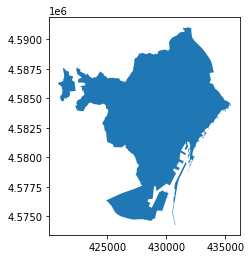

In [122]:
place_name = 'Barcelona, Spain'
area = ox.geocode_to_gdf(place_name)
area = ox.projection.project_gdf(area)
area.plot()

In [132]:
area.plot(ax = ax)

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

In [127]:
poly = area['geometry'].item()

# get minimum bounding box around polygon
box = poly.minimum_rotated_rectangle

# get coordinates of polygon vertices
x, y = box.exterior.coords.xy

# get length of bounding box edges
edge_length = (Point(x[0], y[0]).distance(Point(x[1], y[1])), Point(x[1], y[1]).distance(Point(x[2], y[2])))

# get length of polygon as the longest edge of the bounding box
length = int(max(edge_length))

# get width of polygon as the shortest edge of the bounding box
width = int(min(edge_length))


In [128]:
# (Square) grid side length.
m = 50
# Maximum numbter of iterations.
nitmax = 200
# Number of particles in the simulation.
nparticles = 50000
# Output a frame (plot image) every nevery iterations.
nevery = 2
# Constant maximum value of z-axis value for plots.           # Crec que hauria de ser el valor més alt de la taula.
zmax = 300

### Create 3D figure

(12992, 12992)
2 / 200


ValueError: shape mismatch: objects cannot be broadcast to a single shape

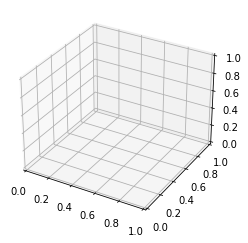

In [129]:
# Create the 3D figure object.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# We'll need a meshgrid to plot the surface: this is X, Y.
x = y = np.linspace(1,length,width)
X, Y = np.meshgrid(x, y)
print(X.shape)

# vmin, vmax set the minimum and maximum values for the colormap. This is to
# be fixed for all plots, so define a suitable norm.
vmin, vmax = 0, zmax
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Initialize the location of all the particles to the centre of the grid.
locs = np.ones((nparticles, 2), dtype=int) * m//2

# Iterate for nitmax cycles.
for j in range(nitmax):
    # Update the particles' locations at random. Particles move at random to
    # an adjacent grid cell. We're going to be pretty relaxed about the ~11%
    # probability that a particle doesn't move at all (displacement of (0,0)).
    locs += np.random.randint(-1, 2, locs.shape)
    if not (j+1) % nevery:
        # Create an updated grid and plot it.
        grid = np.zeros((m, m))
        for i in range(nparticles):
            x, y = locs[i]
            # Add a particle to the grid if it is actually on the grid!
            if 0 <= x < m and 0 <= y < m:
                grid[x, y] += 1
        print(j+1,'/',nitmax)
        # Now clear the Axes of any previous plot and make a new surface plot.
        ax.clear()
        ax.plot()
        ax.plot_surface(X, Y, grid, rstride=1, cstride=1, cmap=plt.cm.autumn,
                        linewidth=1, vmin=vmin, vmax=vmax, norm=norm)
        ax.set_zlim(0, zmax)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        #plt.show()
        # Save to 'diff-000.png', 'diff-001.png', ...
        plt.savefig('plots_2D/diff-{:03d}.png'.format(j//nevery))
        

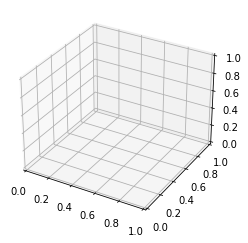

In [62]:
# Create the 3D figure object.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# We'll need a meshgrid to plot the surface: this is X, Y.
x = y = np.linspace(1,m,m)
X, Y = np.meshgrid(x, y)

# vmin, vmax set the minimum and maximum values for the colormap. This is to
# be fixed for all plots, so define a suitable norm.
vmin, vmax = 0, zmax
norm = colors.Normalize(vmin=vmin, vmax=vmax)

### Function

In [63]:
# Initialize the location of all the particles to the centre of the grid.
locs = np.ones((nparticles, 2), dtype=int) * m//2

In [61]:
# Iterate for nitmax cycles.
for j in range(nitmax):
    # Update the particles' locations at random. Particles move at random to
    # an adjacent grid cell. We're going to be pretty relaxed about the ~11%
    # probability that a particle doesn't move at all (displacement of (0,0)).
    locs += np.random.randint(-1, 2, locs.shape)
    if not (j+1) % nevery:
        # Create an updated grid and plot it.
        grid = np.zeros((m, m))
        for i in range(nparticles):
            x, y = locs[i]
            # Add a particle to the grid if it is actually on the grid!
            if 0 <= x < m and 0 <= y < m:
                grid[x, y] += 1
        print(j+1,'/',nitmax)
        # Now clear the Axes of any previous plot and make a new surface plot.
        ax.clear()
        ax.plot_surface(X, Y, grid, rstride=1, cstride=1, cmap=plt.cm.autumn,
                        linewidth=1, vmin=vmin, vmax=vmax, norm=norm)
        ax.set_zlim(0, zmax)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


        plt.show()
        # Save to 'diff-000.png', 'diff-001.png', ...
        plt.savefig('plots_2D/diff-{:03d}.png'.format(j//nevery))
        break

2 / 200


<Figure size 432x288 with 0 Axes>

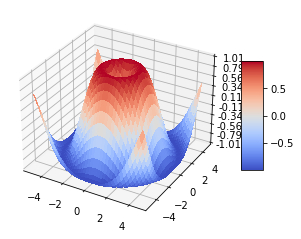

In [45]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
